# Practica 2: Recurrent Neural Network (RNN))


Las RNN buscan modelar dependencias a largo plazo, conectando información previa con el presente. Para esto cuentan con un mecanismo de retroalimentación.

En esta segunda parte de la practica 2 vamos a implementar una RNN usando Keras para la estimación de valores en una serie de tiempo.

### Importar librerias



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

##Cargar datos
Primero vamos a cargar una serie de tiempo que se encuentra en el archivo monthly-sunspots.csv.

Las manchas solares son fenómenos temporales en la fotosfera del Sol que aparecen como manchas más oscuras que las zonas circundantes. Son regiones de temperatura superficial reducida causada por concentraciones de flujo de campo magnético que inhiben la convección.

In [ ]:
#Leer datos (solo la segunda columna) en formato float32

#Scalar los datos de 0 a 1 y obtener un arreglo de 1d

# Dividir los datos en entrenamiento (80%) y prueba (20%)


In [ ]:
#Visualizar datos de entrenamiento


In [ ]:
#Visualizar datos de prueba


##Preparación de datos para entrenamiento
El siguiente paso es preparar los datos para el entrenamiento del modelo Keras. El array de entrada debe tener la siguiente forma: total_samples x time_steps x features.

Hay muchas formas de preparar los datos de series temporales para el entrenamiento. Crearemos filas de entrada con pasos de tiempo no solapados.

Un ejemplo para time_steps = 2 sería:

Entrada:

x = [(0,10), (20,30), (40,50)]

t = [(0, 1), ( 2, 3), ( 4, 5)]

Salida:

y = [   20,      40,       60]

t = [    2,       4,        6]

Aquí, time_steps denota el número de pasos de tiempo anteriores a utilizar para predecir el siguiente valor de los datos de series temporales.

La siguiente función permitira construir estos arreglos. Recibiendo los datos y el time_steps. La salida de la función son los vectores X y Y, donde Y es el valor a estimar mediante la red.

*   Usaremos el metodo np.arange(start, stop, step) para generar los indices entre [start, stop) espaciados por time_steps
*   El total de muestras será los datos disponibles / time_steps



In [ ]:
#Metodo para construir los conjuntos X y Y de entrenamiento y prueba
def get_XY(dat, time_steps):
    # Indices del arreglo Y

    # Arreglo de los valores a estimar

    # Organización de X en un arreglo de
    # total_samples x time_steps x features

    return X, Y

#Usaremos un time_steps de 12 meses

#Organizamos los datos de entrenamiento

#Organizamos los datos de prueba


In [ ]:
#Revisamos las dimensiones de los conjuntos



Nota: en este ejemplo estamos usando 12 muestras en el tiempo para estimar un valor de mancha solar.

##Construcción del modelo RNN
Vamos a emplear el modelo secuencial con una RNN, utilizaremos un arquitectura sencilla:


*   Una capa RNN con 3 neuronas ocultas
*   Una capa RNN de salida con 1 neurona para predecir el valor
*   Usaremos la función de activación tanh
*   Asegúrese de establecer return_sequences=True para todas las capas recurrentes (excepto la última, si sólo le interesa la última salida). Sino, la salida será un arreglo 2D (solo con la salida del ultimo paso) en vez de un arreglo 3D (con las salidas de TODOS los pasos). Esto genera un error en las siguientes capas.


In [ ]:
#Importar librerias


In [ ]:
#Configurar el modelo

#Capa RNN con 3 neuronas

#Capa RNN con 1 neurona


In [ ]:
#Exploración de la arquitectura
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 12, 3)             15        
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 1)                 5         
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Entrenamiento del modelo

In [ ]:
#Parametros para entrenamiento
model.compile(optimizer='adam',
              loss='mean_squared_error')
#Entrenamiento
history = model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 2s - loss: 0.0625 - 2s/epoch - 11ms/step
Epoch 2/20
187/187 - 1s - loss: 0.0401 - 778ms/epoch - 4ms/step
Epoch 3/20
187/187 - 1s - loss: 0.0305 - 958ms/epoch - 5ms/step
Epoch 4/20
187/187 - 1s - loss: 0.0256 - 1s/epoch - 7ms/step
Epoch 5/20
187/187 - 1s - loss: 0.0231 - 970ms/epoch - 5ms/step
Epoch 6/20
187/187 - 1s - loss: 0.0216 - 983ms/epoch - 5ms/step
Epoch 7/20
187/187 - 1s - loss: 0.0203 - 552ms/epoch - 3ms/step
Epoch 8/20
187/187 - 1s - loss: 0.0191 - 546ms/epoch - 3ms/step
Epoch 9/20
187/187 - 1s - loss: 0.0186 - 562ms/epoch - 3ms/step
Epoch 10/20
187/187 - 1s - loss: 0.0174 - 558ms/epoch - 3ms/step
Epoch 11/20
187/187 - 1s - loss: 0.0171 - 598ms/epoch - 3ms/step
Epoch 12/20
187/187 - 1s - loss: 0.0164 - 584ms/epoch - 3ms/step
Epoch 13/20
187/187 - 1s - loss: 0.0159 - 571ms/epoch - 3ms/step
Epoch 14/20
187/187 - 1s - loss: 0.0154 - 571ms/epoch - 3ms/step
Epoch 15/20
187/187 - 1s - loss: 0.0153 - 644ms/epoch - 3ms/step
Epoch 16/20
187/187 - 1s - loss: 0.0148

##Predicciones con el modelo

In [ ]:
# Aplicar el modelo a datos de prueba
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

2/2 [==============================] - 0s 11ms/step


##Metricas de desempeño

In [ ]:
# Vamos a usar las mismas metricas de la practica 1
from sklearn import metrics

print('MSE: ', metrics.mean_squared_error(testY,test_predict))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(testY,test_predict)))
print('MAE: ', metrics.mean_absolute_error(testY,test_predict))
print('R2_score: ', metrics.r2_score(testY,test_predict))

MSE:  0.024790414
RMSE:  0.15744972
MAE:  0.11275774
R2_score:  0.4628463751745999


##Visualización del resultado

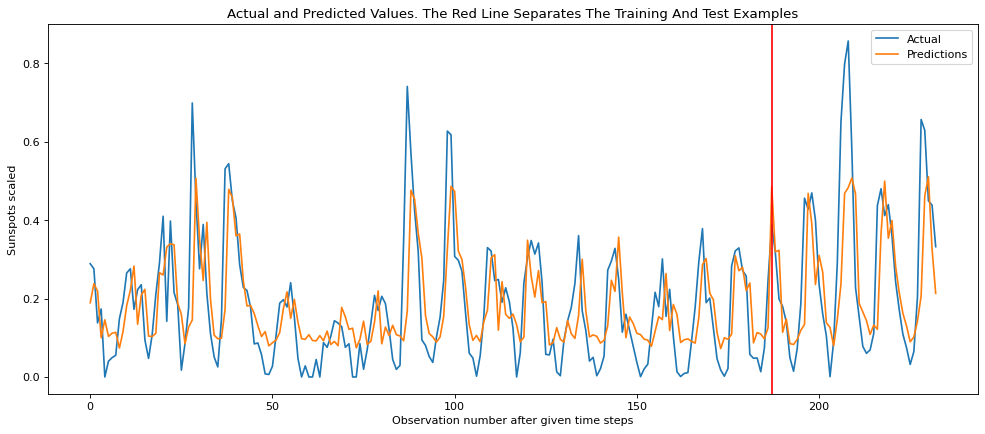

In [ ]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)

# ¡Gran trabajo!